# Alzheimer Prediction

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\MAHARSH SHAH\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('Alz_pred.csv')
df

Country  Age  Gender  Education Level   BMI  \
0             Spain   90    Male                1  33.0   
1         Argentina   72    Male                7  29.9   
2      South Africa   86  Female               19  22.9   
3             China   53    Male               17  31.2   
4            Sweden   58  Female                3  30.0   
...             ...  ...     ...              ...   ...   
74278        Russia   60  Female                3  22.6   
74279            UK   58    Male               18  30.6   
74280         Spain   57  Female               13  28.2   
74281        Brazil   73  Female                7  29.0   
74282        Norway   57  Female                1  31.7   

      Physical Activity Level Smoking Status Alcohol Consumption Diabetes  \
0                      Medium          Never        Occasionally       No   
1                      Medium         Former               Never       No   
2                        High        Current        Occasionally       No   
3                         Low          Never           Regularly      Yes   
4                        High         Former               Never      Yes   
...                       ...            ...                 ...      ...   
74278                    High         Former               Never       No   
74279                     Low          Never        Occasionally      Yes   
74280                  Medium          Never           Regularly       No   
74281                     Low          Never           Regularly       No   
74282                     Low        Current           Regularly       No   

      Hypertension  ... Dietary Habits Air Pollution Exposure  \
0               No  ...        Healthy                   High   
1               No  ...        Healthy                 Medium   
2              Yes  ...        Average                 Medium   
3               No  ...        Healthy                 Medium   
4               No  ...      Unhealthy                   High   
...            ...  ...            ...                    ...   
74278           No  ...        Average                   High   
74279           No  ...        Average                 Medium   
74280           No  ...        Healthy                    Low   
74281           No  ...        Healthy                    Low   
74282           No  ...        Average                    Low   

       Employment Status Marital Status Genetic Risk Factor (APOE-ε4 allele)  \
0                Retired         Single                                   No   
1             Unemployed        Widowed                                   No   
2               Employed         Single                                   No   
3                Retired         Single                                   No   
4               Employed        Married                                   No   
...                  ...            ...                                  ...   
74278         Unemployed        Widowed                                   No   
74279         Unemployed         Single                                   No   
74280           Employed         Single                                  Yes   
74281           Employed        Widowed                                   No   
74282         Unemployed         Single                                   No   

      Social Engagement Level Income Level Stress Levels  \
0                         Low       Medium          High   
1                        High          Low          High   
2                         Low       Medium          High   
3                        High       Medium           Low   
4                         Low       Medium          High   
...                       ...          ...           ...   
74278                  Medium         High        Medium   
74279                  Medium         High          High   
74280                    High          Low           Low   
74281                     Low       

# Basic Checks  

In [3]:
df.shape

(74283, 25)

In [4]:
df.head()

Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0         Spain   90    Male                1  33.0                  Medium   
1     Argentina   72    Male                7  29.9                  Medium   
2  South Africa   86  Female               19  22.9                    High   
3         China   53    Male               17  31.2                     Low   
4        Sweden   58  Female                3  30.0                    High   

  Smoking Status Alcohol Consumption Diabetes Hypertension  ...  \
0          Never        Occasionally       No           No  ...   
1         Former               Never       No           No  ...   
2        Current        Occasionally       No          Yes  ...   
3          Never           Regularly      Yes           No  ...   
4         Former               Never      Yes           No  ...   

  Dietary Habits Air Pollution Exposure  Employment Status Marital Status  \
0        Healthy                   High            Retired         Single   
1        Healthy                 Medium         Unemployed        Widowed   
2        Average                 Medium           Employed         Single   
3        Healthy                 Medium            Retired         Single   
4      Unhealthy                   High           Employed        Married   

  Genetic Risk Factor (APOE-ε4 allele) Social Engagement Level Income Level  \
0                                   No                     Low       Medium   
1                                   No                    High          Low   
2                                   No                     Low       Medium   
3                                   No                    High       Medium   
4                                   No                     Low       Medium   

  Stress Levels Urban vs Rural Living Alzheimer’s Diagnosis  
0          High                 Urban                    No  
1          High                 Urban                    No  
2          High                 Rural                    No  
3           Low                 Rural                    No  
4          High                 Rural                    No  

[5 rows x 25 columns]

In [5]:
df.tail()

Country  Age  Gender  Education Level   BMI Physical Activity Level  \
74278  Russia   60  Female                3  22.6                    High   
74279      UK   58    Male               18  30.6                     Low   
74280   Spain   57  Female               13  28.2                  Medium   
74281  Brazil   73  Female                7  29.0                     Low   
74282  Norway   57  Female                1  31.7                     Low   

      Smoking Status Alcohol Consumption Diabetes Hypertension  ...  \
74278         Former               Never       No           No  ...   
74279          Never        Occasionally      Yes           No  ...   
74280          Never           Regularly       No           No  ...   
74281          Never           Regularly       No           No  ...   
74282        Current           Regularly       No           No  ...   

      Dietary Habits Air Pollution Exposure  Employment Status Marital Status  \
74278        Average                   High         Unemployed        Widowed   
74279        Average                 Medium         Unemployed         Single   
74280        Healthy                    Low           Employed         Single   
74281        Healthy                    Low           Employed        Widowed   
74282        Average                    Low         Unemployed         Single   

      Genetic Risk Factor (APOE-ε4 allele) Social Engagement Level  \
74278                                   No                  Medium   
74279                                   No                  Medium   
74280                                  Yes                    High   
74281                                   No                     Low   
74282                                   No                     Low   

      Income Level Stress Levels Urban vs Rural Living Alzheimer’s Diagnosis  
74278         High        Medium                 Rural                    No  
74279         High          High                 Rural                    No  
74280          Low           Low                 Rural                    No  
74281          Low          High                 Rural                    No  
74282       Medium        Medium                 Urban                    No  

[5 rows x 25 columns]

In [6]:
df.dtypes

Country                                  object
Age                                       int64
Gender                                   object
Education Level                           int64
BMI                                     float64
Physical Activity Level                  object
Smoking Status                           object
Alcohol Consumption                      object
Diabetes                                 object
Hypertension                             object
Cholesterol Level                        object
Family History of Alzheimer’s            object
Cognitive Test Score                      int64
Depression Level                         object
Sleep Quality                            object
Dietary Habits                           object
Air Pollution Exposure                   object
Employment Status                        object
Marital Status                           object
Genetic Risk Factor (APOE-ε4 allele)     object
Social Engagement Level                 

In [7]:
df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [9]:
df.describe()

Age  Education Level           BMI  Cognitive Test Score
count  74283.000000     74283.000000  74283.000000          74283.000000
mean      71.964703         9.487514     26.780639             64.654241
std       12.980748         5.757020      4.764679             20.153247
min       50.000000         0.000000     18.500000             30.000000
25%       61.000000         4.000000     22.700000             47.000000
50%       72.000000         9.000000     26.800000             65.000000
75%       83.000000        14.000000     30.900000             82.000000
max       94.000000        19.000000     35.000000             99.000000

## Renaming Columns

In [10]:
df.rename(columns={'Education Level':'EL','Physical Activity Level':'PhyACT','Smoking Status':'SmokingSt','Alcohol Consumption':'AlcConsump','Cholesterol Level':'CholesLev','Family History of Alzheimer’s':'FamHist','Cognitive Test Score':'CognitiveTest','Depression Level':'Depress','Sleep Quality':'SleepQ','Dietary Habits':'Diet','Air Pollution Exposure':'AirPollExp','Employment Status':'EmpSt','Marital Status':'Marital','Genetic Risk Factor (APOE-ε4 allele)':'GeneticRisk','Social Engagement Level':'SocialEng','Income Level':'Income','Stress Levels':'Stress','Urban vs Rural Living':'UrbRur','Alzheimer’s Diagnosis':'AlzDiag'}, inplace=True)

In [11]:
df

Country  Age  Gender  EL   BMI  PhyACT SmokingSt    AlcConsump  \
0             Spain   90    Male   1  33.0  Medium     Never  Occasionally   
1         Argentina   72    Male   7  29.9  Medium    Former         Never   
2      South Africa   86  Female  19  22.9    High   Current  Occasionally   
3             China   53    Male  17  31.2     Low     Never     Regularly   
4            Sweden   58  Female   3  30.0    High    Former         Never   
...             ...  ...     ...  ..   ...     ...       ...           ...   
74278        Russia   60  Female   3  22.6    High    Former         Never   
74279            UK   58    Male  18  30.6     Low     Never  Occasionally   
74280         Spain   57  Female  13  28.2  Medium     Never     Regularly   
74281        Brazil   73  Female   7  29.0     Low     Never     Regularly   
74282        Norway   57  Female   1  31.7     Low   Current     Regularly   

      Diabetes Hypertension  ...       Diet AirPollExp       EmpSt  Marital  \
0           No           No  ...    Healthy       High     Retired   Single   
1           No           No  ...    Healthy     Medium  Unemployed  Widowed   
2           No          Yes  ...    Average     Medium    Employed   Single   
3          Yes           No  ...    Healthy     Medium     Retired   Single   
4          Yes           No  ...  Unhealthy       High    Employed  Married   
...        ...          ...  ...        ...        ...         ...      ...   
74278       No           No  ...    Average       High  Unemployed  Widowed   
74279      Yes           No  ...    Average     Medium  Unemployed   Single   
74280       No           No  ...    Healthy        Low    Employed   Single   
74281       No           No  ...    Healthy        Low    Employed  Widowed   
74282       No           No  ...    Average        Low  Unemployed   Single   

      GeneticRisk SocialEng  Income  Stress UrbRur AlzDiag  
0              No       Low  Medium    High  Urban      No  
1              No      High     Low    High  Urban      No  
2              No       Low  Medium    High  Rural      No  
3              No      High  Medium     Low  Rural      No  
4              No       Low  Medium    High  Rural      No  
...           ...       ...     ...     ...    ...     ...  
74278          No    Medium    High  Medium  Rural      No  
74279          No    Medium    High    High  Rural      No  
74280         Yes      High     Low     Low  Rural      No  
74281          No       Low     Low    High  Rural      No  
74282          No       Low  Medium  Medium  Urban      No  

[74283 rows x 25 columns]

In [12]:
df.columns

Index(['Country', 'Age', 'Gender', 'EL', 'BMI', 'PhyACT', 'SmokingSt',
       'AlcConsump', 'Diabetes', 'Hypertension', 'CholesLev', 'FamHist',
       'CognitiveTest', 'Depress', 'SleepQ', 'Diet', 'AirPollExp', 'EmpSt',
       'Marital', 'GeneticRisk', 'SocialEng', 'Income', 'Stress', 'UrbRur',
       'AlzDiag'],
      dtype='object')

In [13]:
num_data=df.select_dtypes(include=["float64","int64"])
print("numerical colums",num_data.columns)


numerical colums Index(['Age', 'EL', 'BMI', 'CognitiveTest'], dtype='object')


In [14]:
cat_data=df.select_dtypes(include=["O"])
print("categorical colums",cat_data.columns)

categorical colums Index(['Country', 'Gender', 'PhyACT', 'SmokingSt', 'AlcConsump', 'Diabetes',
       'Hypertension', 'CholesLev', 'FamHist', 'Depress', 'SleepQ', 'Diet',
       'AirPollExp', 'EmpSt', 'Marital', 'GeneticRisk', 'SocialEng', 'Income',
       'Stress', 'UrbRur', 'AlzDiag'],
      dtype='object')


In [15]:
for i in cat_data.drop("AlzDiag",axis=1):
    print(i,df[i].unique())
    print(df[i].value_counts())
    print("**********************")

Country ['Spain' 'Argentina' 'South Africa' 'China' 'Sweden' 'South Korea'
 'Germany' 'UK' 'Canada' 'India' 'Italy' 'USA' 'Russia' 'Japan'
 'Australia' 'France' 'Norway' 'Saudi Arabia' 'Mexico' 'Brazil']
Country
Brazil          3839
Germany         3807
Australia       3787
Russia          3778
South Africa    3760
Japan           3751
India           3741
South Korea     3732
Argentina       3731
Italy           3724
Canada          3711
France          3710
Norway          3706
Spain           3698
Sweden          3689
Saudi Arabia    3662
UK              3651
USA             3616
Mexico          3598
China           3592
Name: count, dtype: int64
**********************
Gender ['Male' 'Female']
Gender
Female    37249
Male      37034
Name: count, dtype: int64
**********************
PhyACT ['Medium' 'High' 'Low']
PhyACT
High      24853
Low       24754
Medium    24676
Name: count, dtype: int64
**********************
SmokingSt ['Never' 'Former' 'Current']
SmokingSt
Current    24915
Never

# EDA

In [16]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='Age', ylabel='BMI'>

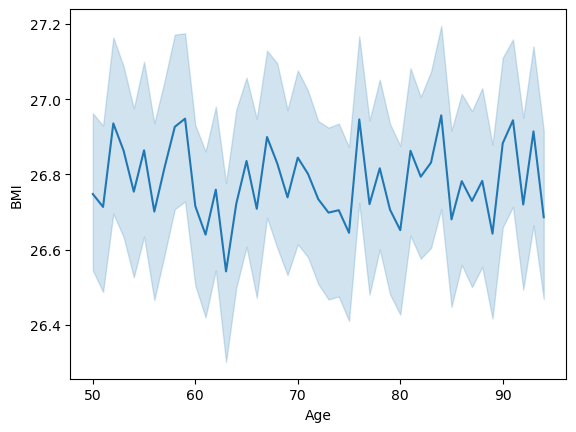

In [17]:
sns.lineplot(x=df.Age,y=df.BMI)

<Axes: xlabel='Age', ylabel='PhyACT'>

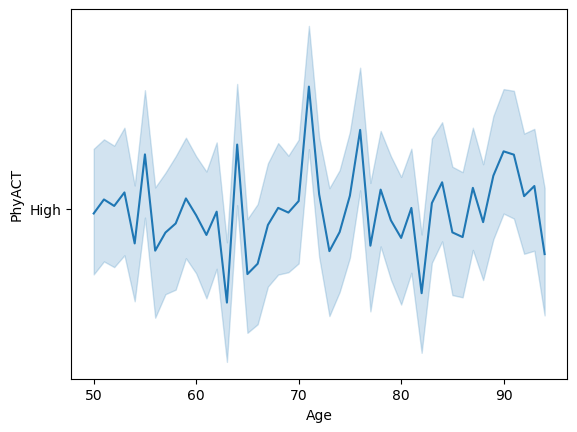

In [18]:
sns.lineplot(x=df.Age,y=df.PhyACT)

<Axes: xlabel='Age', ylabel='Count'>

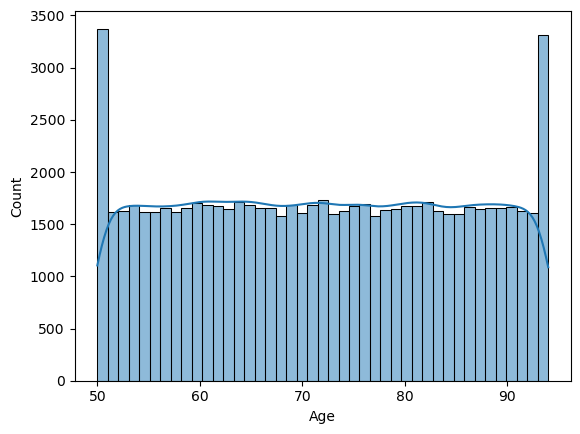

In [19]:
sns.histplot(x=df.Age,kde=True)

<Axes: xlabel='Age'>

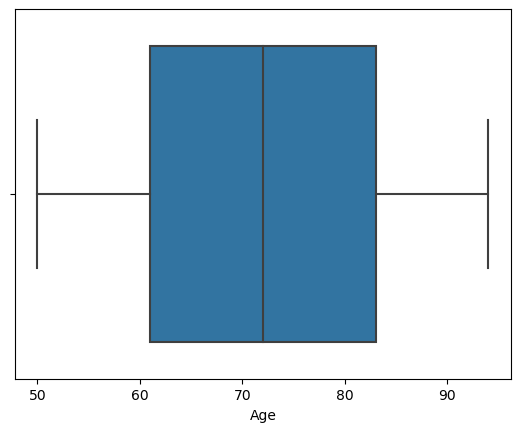

In [20]:
sns.boxplot(x=df.Age)

<Axes: xlabel='BMI', ylabel='Count'>

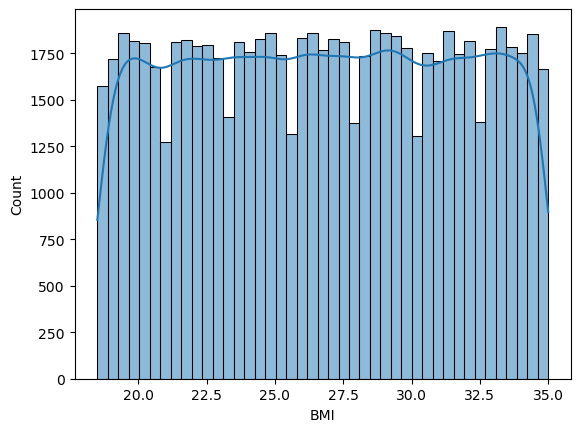

In [21]:
sns.histplot(x=df.BMI,kde=True)

<Axes: xlabel='BMI'>

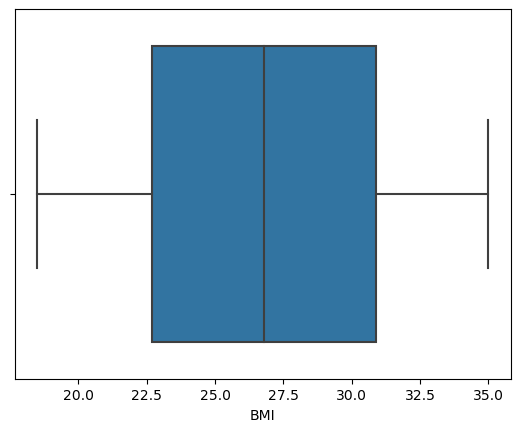

In [22]:
sns.boxplot(x=df.BMI)

<Axes: xlabel='CognitiveTest', ylabel='Count'>

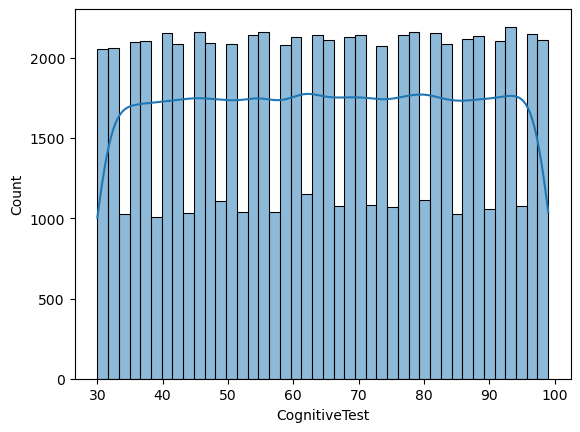

In [23]:
sns.histplot(x=df.CognitiveTest,kde=True)

<Axes: xlabel='CognitiveTest'>

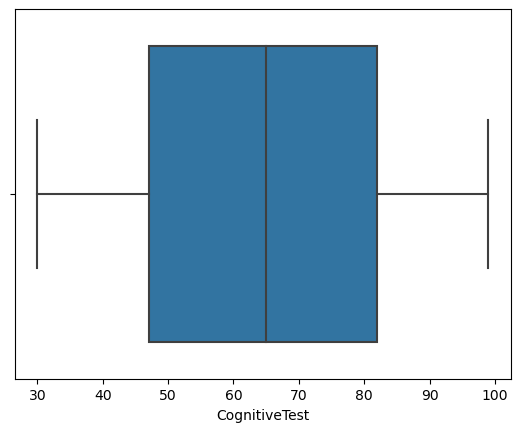

In [24]:
sns.boxplot(x=df.CognitiveTest)

<Axes: xlabel='BMI', ylabel='PhyACT'>

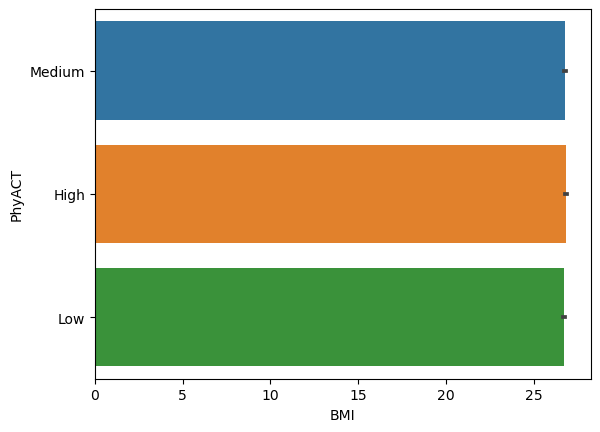

In [25]:
sns.barplot(x=df.BMI,y=df.PhyACT)

<Axes: xlabel='AlzDiag', ylabel='Age'>

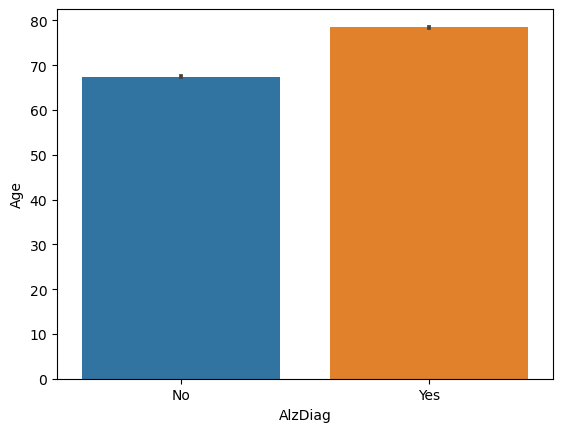

In [26]:
sns.barplot(x=df.AlzDiag,y=df.Age)

<Axes: xlabel='AlzDiag', ylabel='BMI'>

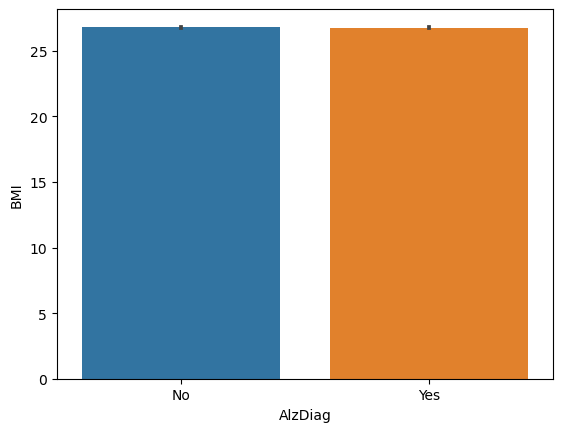

In [27]:
sns.barplot(x=df.AlzDiag,y=df.BMI)

<Axes: xlabel='AlzDiag', ylabel='CognitiveTest'>

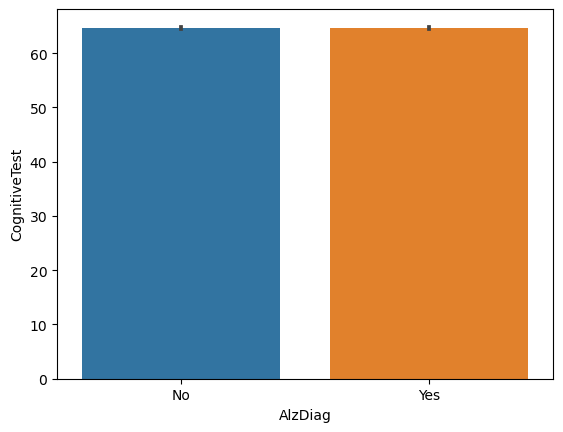

In [28]:
sns.barplot(x=df.AlzDiag,y=df.CognitiveTest)

<Axes: xlabel='SmokingSt', ylabel='Age'>

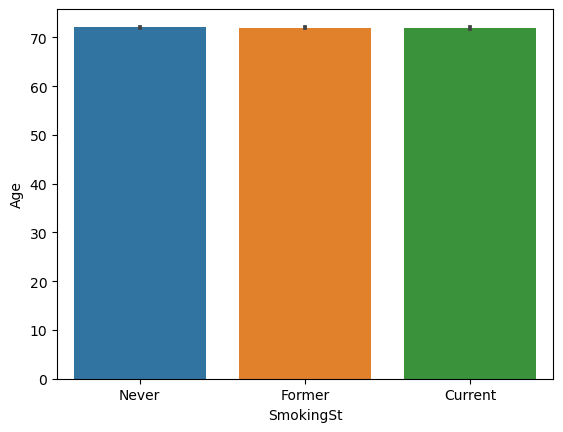

In [29]:
sns.barplot(x=df.SmokingSt,y=df.Age)

<Axes: xlabel='SmokingSt', ylabel='Count'>

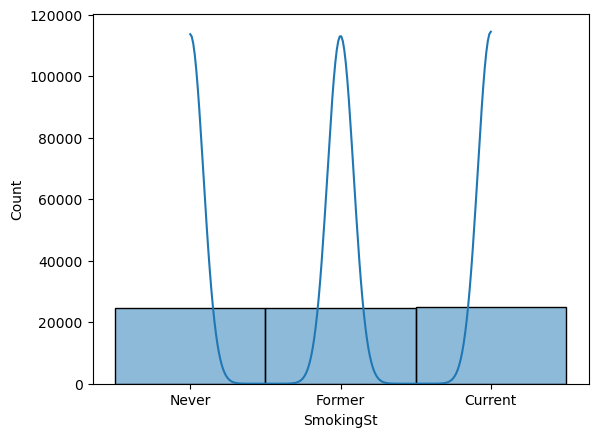

In [30]:
sns.histplot(x=df.SmokingSt,kde=True)

<Axes: xlabel='AlcConsump', ylabel='Count'>

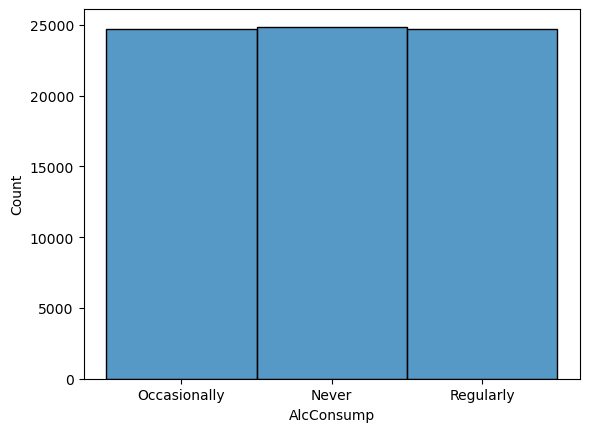

In [31]:
sns.histplot(x=df.AlcConsump)

## Bivariate Analysis 

In [32]:
d1=df[['Country', 'Gender', 'PhyACT', 'SmokingSt', 'AlcConsump', 'Diabetes',
       'Hypertension', 'CholesLev', 'FamHist', 'Depress', 'SleepQ', 'Diet',
       'AirPollExp', 'EmpSt', 'Marital', 'GeneticRisk', 'SocialEng', 'Income',
       'Stress', 'UrbRur', 'AlzDiag']]

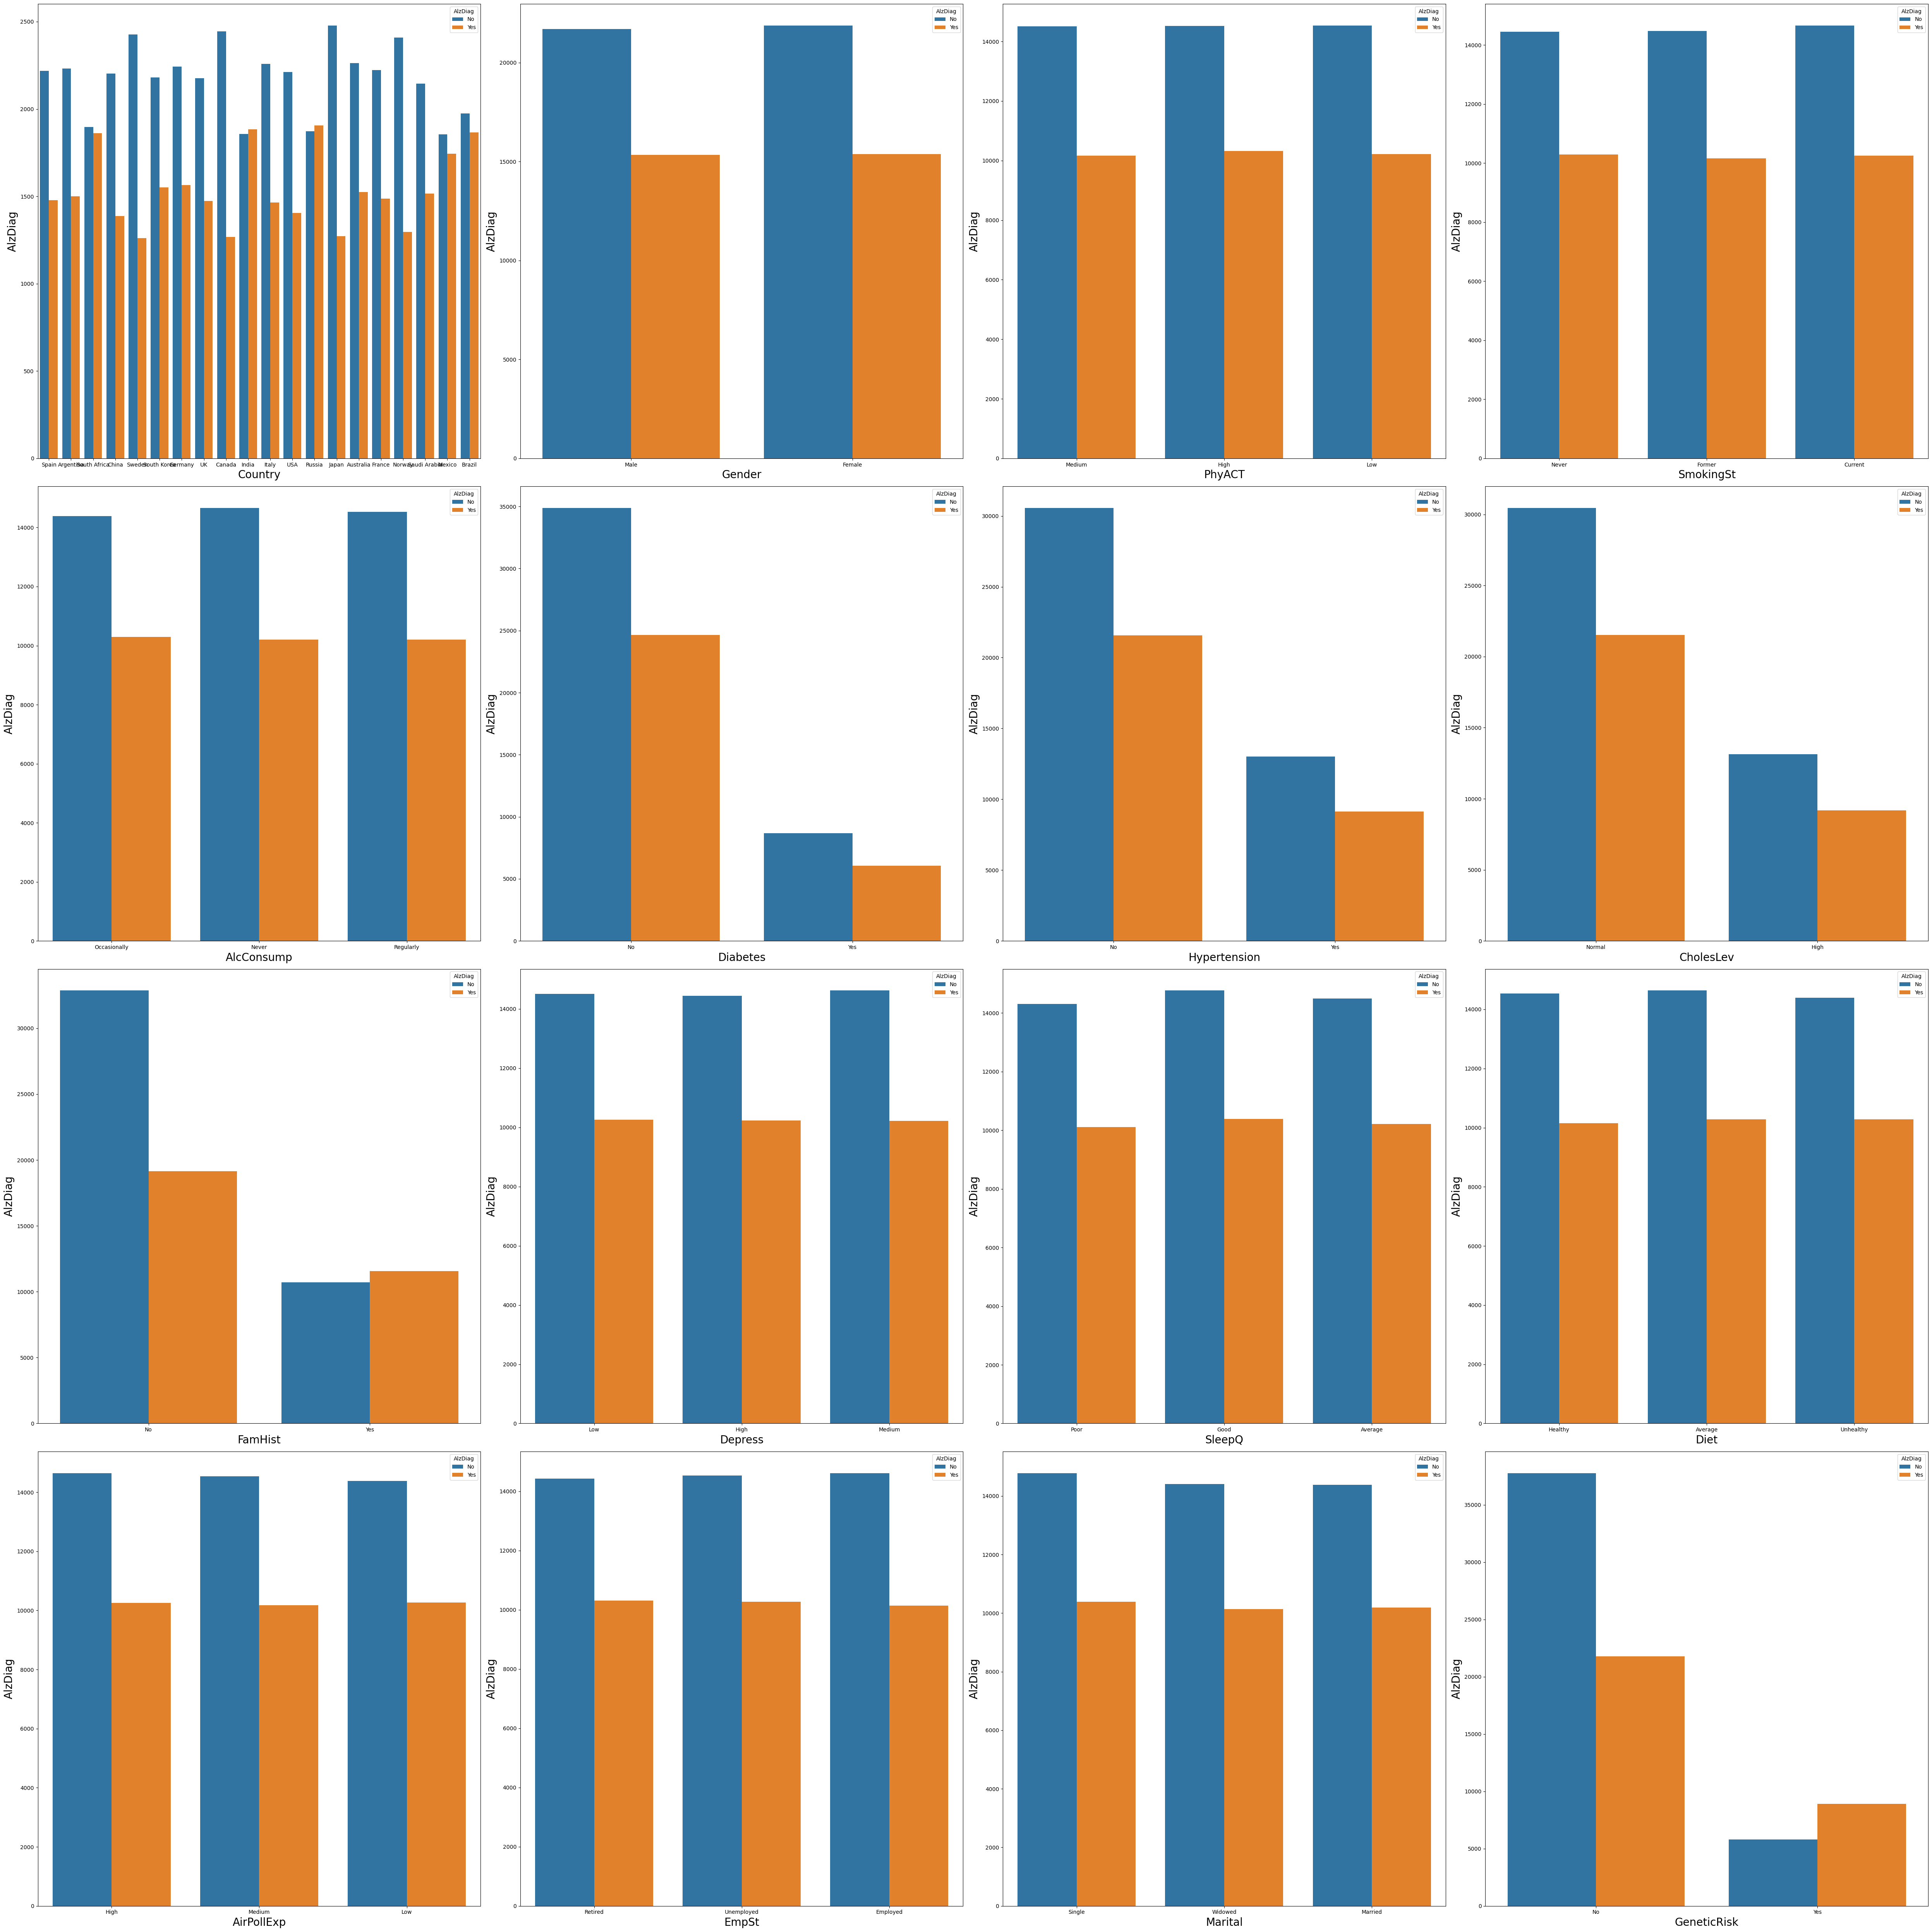

In [33]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(50,50), facecolor='white')#canvas size
plotnumber = 1#count variable

for column in d1:#for loop to acess columns form data1
    if plotnumber<=16 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(4,4,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.countplot(x=d1[column]           #plotting count plot 
                        ,hue=df.AlzDiag)
        plt.xlabel(column,fontsize=20)#assigning name to x-axis and increasing it's font 
        plt.ylabel('AlzDiag',fontsize=20)#assigning name to y-axis and increasing it's font 
    plotnumber+=1#increasing counter
plt.tight_layout()

In [34]:
d2=df[['Age', 'EL', 'BMI', 'CognitiveTest']]

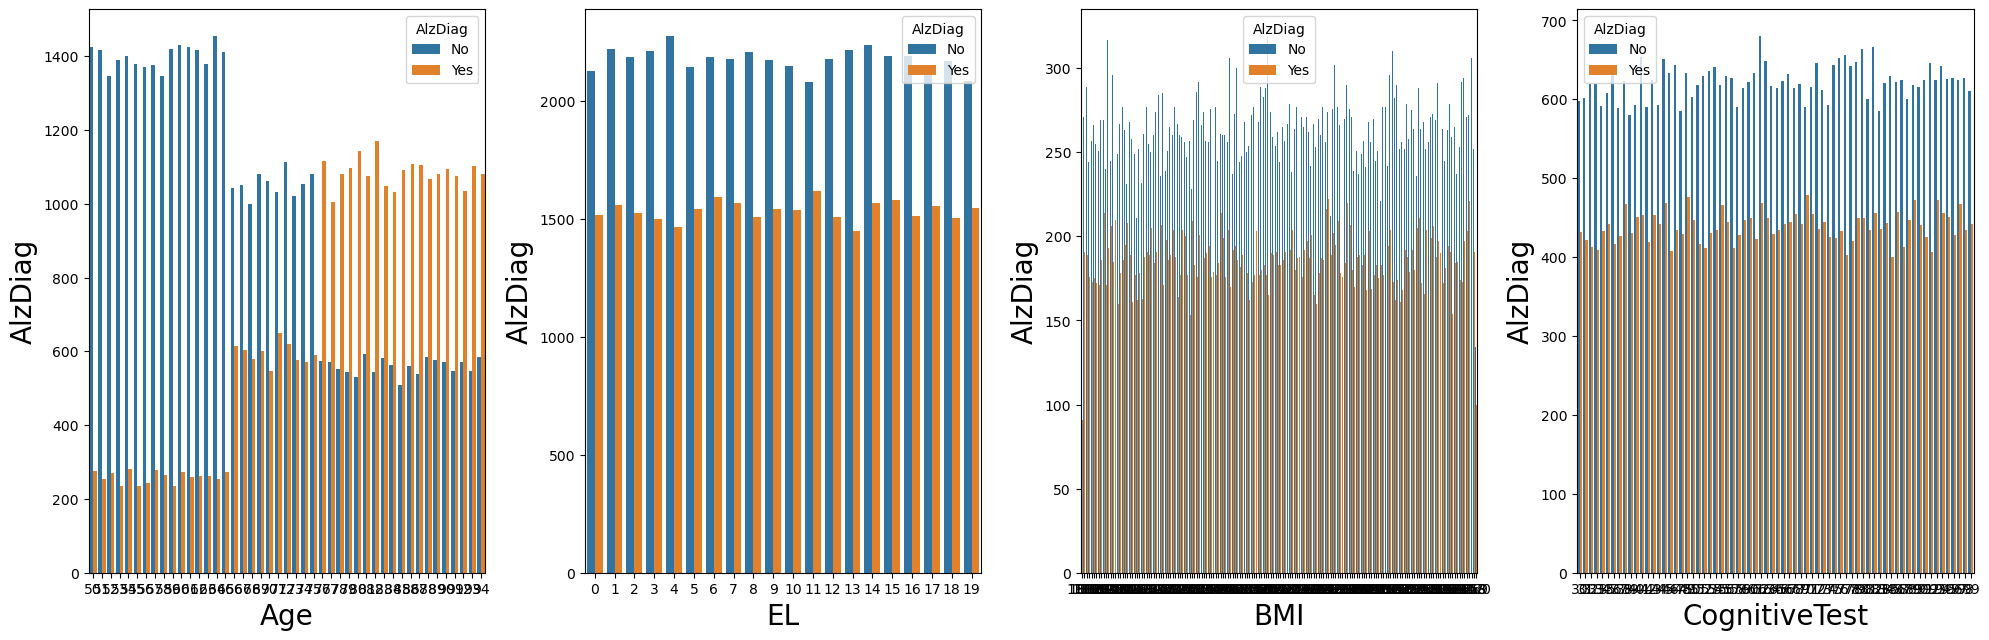

In [35]:
# Plotting how every  discrete feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1

for column in d2:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=d2[column]
                        ,hue=df.AlzDiag)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('AlzDiag',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Multivariate Analysis 

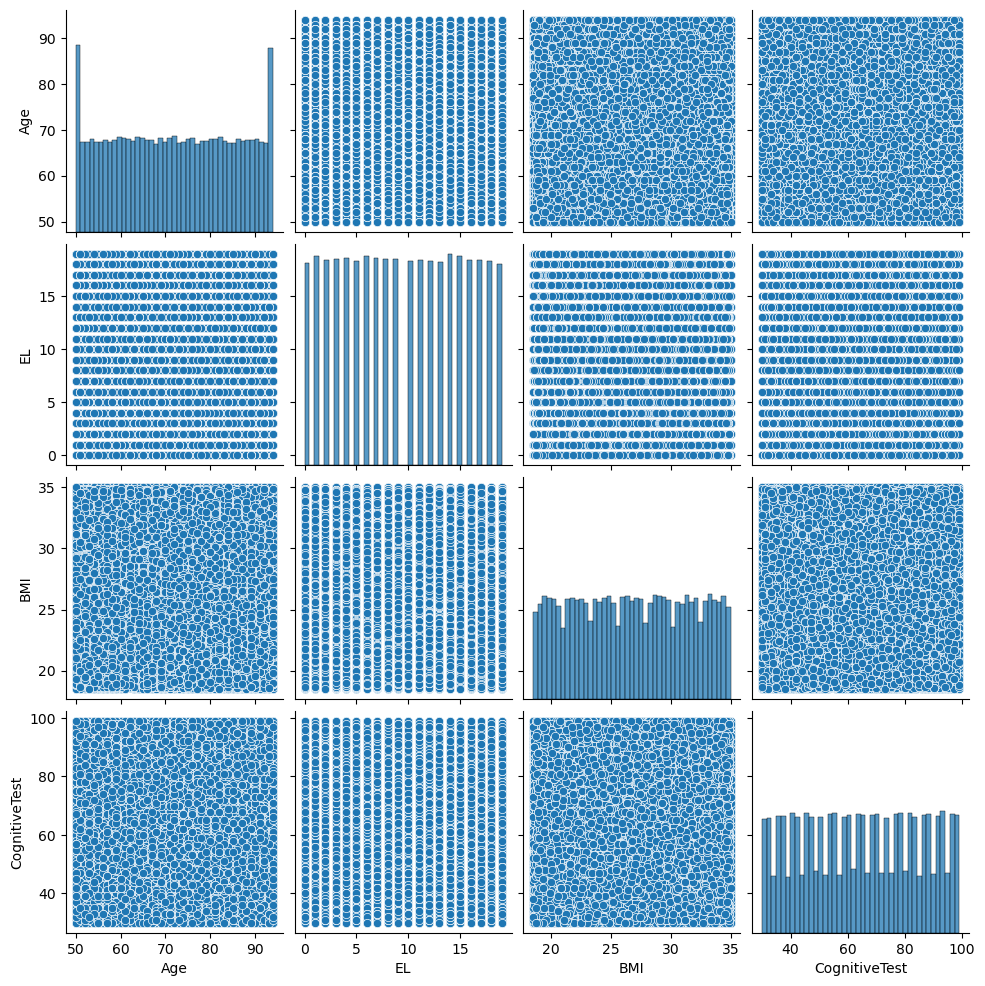

In [36]:
sns.pairplot(df)

# Data Preprocessing

In [37]:
df.isnull().sum()

Country          0
Age              0
Gender           0
EL               0
BMI              0
PhyACT           0
SmokingSt        0
AlcConsump       0
Diabetes         0
Hypertension     0
CholesLev        0
FamHist          0
CognitiveTest    0
Depress          0
SleepQ           0
Diet             0
AirPollExp       0
EmpSt            0
Marital          0
GeneticRisk      0
SocialEng        0
Income           0
Stress           0
UrbRur           0
AlzDiag          0
dtype: int64

## Converting Categorical to numerical Columns 

In [38]:
df.columns

Index(['Country', 'Age', 'Gender', 'EL', 'BMI', 'PhyACT', 'SmokingSt',
       'AlcConsump', 'Diabetes', 'Hypertension', 'CholesLev', 'FamHist',
       'CognitiveTest', 'Depress', 'SleepQ', 'Diet', 'AirPollExp', 'EmpSt',
       'Marital', 'GeneticRisk', 'SocialEng', 'Income', 'Stress', 'UrbRur',
       'AlzDiag'],
      dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.Gender=label.fit_transform(df.Gender)

In [40]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.PhyACT=label.fit_transform(df.PhyACT)

In [41]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.SmokingSt=label.fit_transform(df.SmokingSt)

In [42]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.AlcConsump=label.fit_transform(df.AlcConsump)

In [43]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.Diabetes=label.fit_transform(df.Diabetes)

In [44]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.Hypertension=label.fit_transform(df.Hypertension)

In [45]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.CholesLev=label.fit_transform(df.CholesLev)

In [46]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.FamHist=label.fit_transform(df.FamHist)

In [47]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.Depress=label.fit_transform(df.Depress)

In [48]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.SleepQ=label.fit_transform(df.SleepQ)

In [49]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.Diet=label.fit_transform(df.Diet)

In [50]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.AirPollExp=label.fit_transform(df.AirPollExp)

In [51]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.EmpSt=label.fit_transform(df.EmpSt)

In [52]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.Marital=label.fit_transform(df.Marital)

In [53]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.GeneticRisk=label.fit_transform(df.GeneticRisk)

In [54]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.SocialEng=label.fit_transform(df.SocialEng)

In [55]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.Stress=label.fit_transform(df.Stress)

In [56]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
df.AlzDiag=label.fit_transform(df.AlzDiag)

In [57]:
df

Country  Age  Gender  EL   BMI  PhyACT  SmokingSt  AlcConsump  \
0             Spain   90       1   1  33.0       2          2           1   
1         Argentina   72       1   7  29.9       2          1           0   
2      South Africa   86       0  19  22.9       0          0           1   
3             China   53       1  17  31.2       1          2           2   
4            Sweden   58       0   3  30.0       0          1           0   
...             ...  ...     ...  ..   ...     ...        ...         ...   
74278        Russia   60       0   3  22.6       0          1           0   
74279            UK   58       1  18  30.6       1          2           1   
74280         Spain   57       0  13  28.2       2          2           2   
74281        Brazil   73       0   7  29.0       1          2           2   
74282        Norway   57       0   1  31.7       1          0           2   

       Diabetes  Hypertension  ...  Diet  AirPollExp  EmpSt  Marital  \
0             0             0  ...     1           0      1        1   
1             0             0  ...     1           2      2        2   
2             0             1  ...     0           2      0        1   
3             1             0  ...     1           2      1        1   
4             1             0  ...     2           0      0        0   
...         ...           ...  ...   ...         ...    ...      ...   
74278         0             0  ...     0           0      2        2   
74279         1             0  ...     0           2      2        1   
74280         0             0  ...     1           1      0        1   
74281         0             0  ...     1           1      0        2   
74282         0             0  ...     0           1      2        1   

       GeneticRisk  SocialEng  Income  Stress  UrbRur  AlzDiag  
0                0          1  Medium       0   Urban        0  
1                0          0     Low       0   Urban        0  
2                0          1  Medium       0   Rural        0  
3                0          0  Medium       1   Rural        0  
4                0          1  Medium       0   Rural        0  
...            ...        ...     ...     ...     ...      ...  
74278            0          2    High       2   Rural        0  
74279            0          2    High       0   Rural        0  
74280            1          0     Low       1   Rural        0  
74281            0          1     Low       0   Rural        0  
74282            0          1  Medium       2   Urban        0  

[74283 rows x 25 columns]

# Dropping Unnecessary Columns 

In [58]:
## Removing constant features
df.drop(['Country','Income','UrbRur'], axis="columns", inplace=True)#droping those columns which have std=0 

In [59]:
df

Age  Gender  EL   BMI  PhyACT  SmokingSt  AlcConsump  Diabetes  \
0       90       1   1  33.0       2          2           1         0   
1       72       1   7  29.9       2          1           0         0   
2       86       0  19  22.9       0          0           1         0   
3       53       1  17  31.2       1          2           2         1   
4       58       0   3  30.0       0          1           0         1   
...    ...     ...  ..   ...     ...        ...         ...       ...   
74278   60       0   3  22.6       0          1           0         0   
74279   58       1  18  30.6       1          2           1         1   
74280   57       0  13  28.2       2          2           2         0   
74281   73       0   7  29.0       1          2           2         0   
74282   57       0   1  31.7       1          0           2         0   

       Hypertension  CholesLev  ...  Depress  SleepQ  Diet  AirPollExp  EmpSt  \
0                 0          1  ...        1       2     1           0      1   
1                 0          1  ...        1       1     1           2      2   
2                 1          1  ...        0       1     0           2      0   
3                 0          1  ...        2       0     1           2      1   
4                 0          1  ...        0       2     2           0      0   
...             ...        ...  ...      ...     ...   ...         ...    ...   
74278             0          0  ...        2       2     0           0      2   
74279             0          1  ...        1       2     0           2      2   
74280             0          0  ...        1       1     1           1      0   
74281             0          0  ...        0       1     1           1      0   
74282             0          1  ...        1       0     0           1      2   

       Marital  GeneticRisk  SocialEng  Stress  AlzDiag  
0            1            0          1       0        0  
1            2            0          0       0        0  
2            1            0          1       0        0  
3            1            0          0       1        0  
4            0            0          1       0        0  
...        ...          ...        ...     ...      ...  
74278        2            0          2       2        0  
74279        1            0          2       0        0  
74280        1            1          0       1        0  
74281        2            0          1       0        0  
74282        1            0          1       2        0  

[74283 rows x 22 columns]

In [68]:
df.columns

Index(['Age', 'Gender', 'EL', 'BMI', 'PhyACT', 'SmokingSt', 'AlcConsump',
       'Diabetes', 'Hypertension', 'CholesLev', 'FamHist', 'CognitiveTest',
       'Depress', 'SleepQ', 'Diet', 'AirPollExp', 'EmpSt', 'Marital',
       'GeneticRisk', 'SocialEng', 'Stress', 'AlzDiag'],
      dtype='object')

# Feature Engineering

<Axes: >

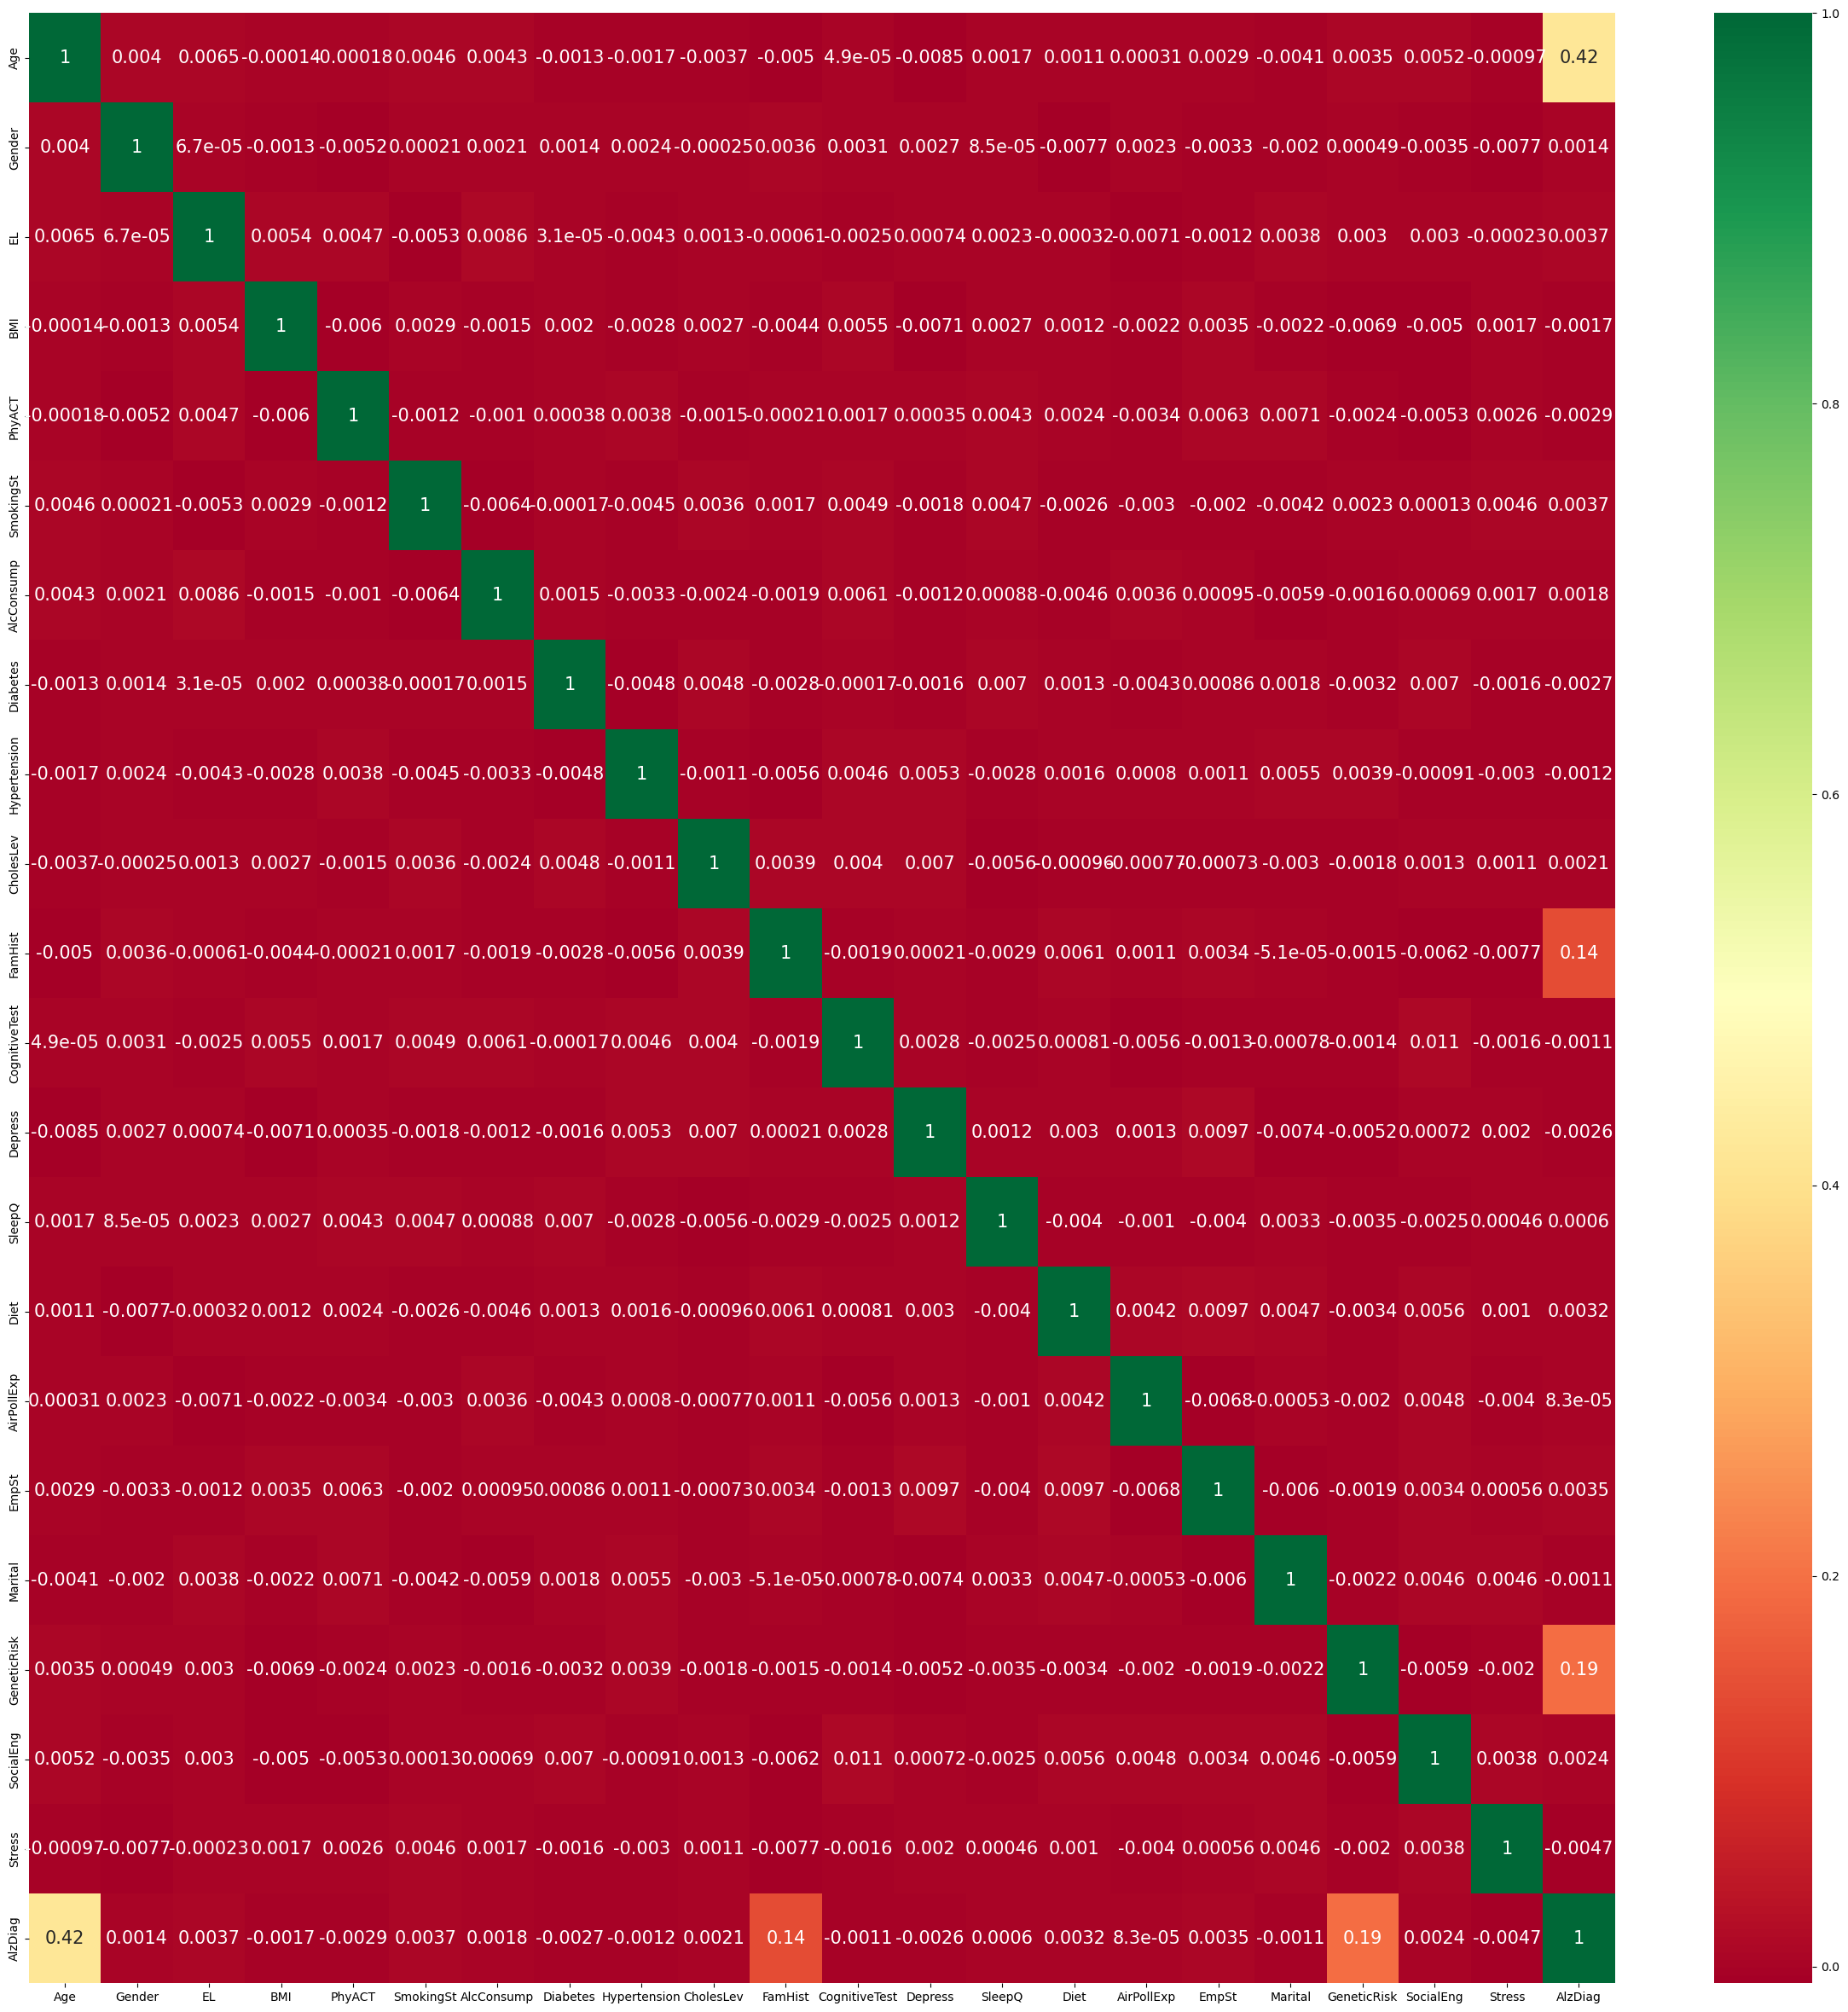

In [60]:
## Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

In [71]:

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[['Age', 'Gender', 'EL', 'BMI', 'PhyACT', 'SmokingSt', 'AlcConsump',
       'Diabetes', 'Hypertension', 'CholesLev', 'FamHist', 'CognitiveTest',
       'Depress', 'SleepQ', 'Diet', 'AirPollExp', 'EmpSt', 'Marital',
       'GeneticRisk', 'SocialEng', 'Stress', 'AlzDiag']]=scaler.fit_transform(df[['Age', 'Gender', 'EL', 'BMI', 'PhyACT', 'SmokingSt', 'AlcConsump',
       'Diabetes', 'Hypertension', 'CholesLev', 'FamHist', 'CognitiveTest',
       'Depress', 'SleepQ', 'Diet', 'AirPollExp', 'EmpSt', 'Marital',
       'GeneticRisk', 'SocialEng', 'Stress', 'AlzDiag']])

df


Age  Gender   EL       BMI  PhyACT  SmokingSt  AlcConsump  \
0      0.818182     1.0 -0.8  0.756098     0.5        0.5         0.0   
1      0.000000     1.0 -0.2  0.378049     0.5        0.0        -0.5   
2      0.636364     0.0  1.0 -0.475610    -0.5       -0.5         0.0   
3     -0.863636     1.0  0.8  0.536585     0.0        0.5         0.5   
4     -0.636364     0.0 -0.6  0.390244    -0.5        0.0        -0.5   
...         ...     ...  ...       ...     ...        ...         ...   
74278 -0.545455     0.0 -0.6 -0.512195    -0.5        0.0        -0.5   
74279 -0.636364     1.0  0.9  0.463415     0.0        0.5         0.0   
74280 -0.681818     0.0  0.4  0.170732     0.5        0.5         0.5   
74281  0.045455     0.0 -0.2  0.268293     0.0        0.5         0.5   
74282 -0.681818     0.0 -0.8  0.597561     0.0       -0.5         0.5   

       Diabetes  Hypertension  CholesLev  ...  Depress  SleepQ  Diet  \
0           0.0           0.0        0.0  ...      0.0     0.5   0.0   
1           0.0           0.0        0.0  ...      0.0     0.0   0.0   
2           0.0           1.0        0.0  ...     -0.5     0.0  -0.5   
3           1.0           0.0        0.0  ...      0.5    -0.5   0.0   
4           1.0           0.0        0.0  ...     -0.5     0.5   0.5   
...         ...           ...        ...  ...      ...     ...   ...   
74278       0.0           0.0       -1.0  ...      0.5     0.5  -0.5   
74279       1.0           0.0        0.0  ...      0.0     0.5  -0.5   
74280       0.0           0.0       -1.0  ...      0.0     0.0   0.0   
74281       0.0           0.0       -1.0  ...     -0.5     0.0   0.0   
74282       0.0           0.0        0.0  ...      0.0    -0.5  -0.5   

       AirPollExp  EmpSt  Marital  GeneticRisk  SocialEng  Stress  AlzDiag  
0            -0.5    0.0      0.0          0.0        0.0    -0.5      0.0  
1             0.5    0.5      0.5          0.0       -0.5    -0.5      0.0  
2             0.5   -0.5      0.0          0.0        0.0    -0.5      0.0  
3             0.5    0.0      0.0          0.0       -0.5     0.0      0.0  
4            -0.5   -0.5     -0.5          0.0        0.0    -0.5      0.0  
...           ...    ...      ...          ...        ...     ...      ...  
74278        -0.5    0.5      0.5          0.0        0.5     0.5      0.0  
74279         0.5    0.5      0.0          0.0        0.5    -0.5      0.0  
74280         0.0   -0.5      0.0          1.0       -0.5     0.0      0.0  
74281         0.0   -0.5      0.5          0.0        0.0    -0.5      0.0  
74282         0.0    0.5      0.0          0.0        0.0     0.5      0.0  

[74283 rows x 22 columns]

# Model Building 

In [72]:
## Split data into x and y
x = df.drop('AlzDiag', axis=1)
y = df.AlzDiag

In [73]:
## training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [74]:
## Balacing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()
x_smote,y_smote=sm.fit_resample(x_train,y_train)

In [75]:
print("actual",Counter(y_train))
print("after smote",Counter(y_smote))

actual Counter({0.0: 34851, 1.0: 24575})
after smote Counter({0.0: 34851, 1.0: 34851})


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)

logistic_regression_pred = logistic_regression_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, logistic_regression_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, logistic_regression_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, logistic_regression_pred)
print("Precision:", precision)

recall = recall_score(y_test, logistic_regression_pred)
print("Recall:", recall)

f1 = f1_score(y_test, logistic_regression_pred)
print("F1 Score:", f1)


Confusion Matrix:
[[6895 1824]
 [2451 3687]]
Accuracy: 0.7122568486235444
Precision: 0.6690255851932498
Recall: 0.6006842619745846
F1 Score: 0.6330157095029616


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)

random_forest_pred = random_forest_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, random_forest_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, random_forest_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, random_forest_pred)
print("Precision:", precision)

recall = recall_score(y_test, random_forest_pred)
print("Recall:", recall)

f1 = f1_score(y_test, random_forest_pred)
print("F1 Score:", f1)


Confusion Matrix:
[[6679 2040]
 [2203 3935]]
Accuracy: 0.7144107154876489
Precision: 0.6585774058577406
Recall: 0.6410883023786249
F1 Score: 0.6497151820358292


In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(x_train, y_train)

gradient_boosting_pred = gradient_boosting_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, gradient_boosting_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, gradient_boosting_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, gradient_boosting_pred)
print("Precision:", precision)

recall = recall_score(y_test, gradient_boosting_pred)
print("Recall:", recall)

f1 = f1_score(y_test, gradient_boosting_pred)
print("F1 Score:", f1)


Confusion Matrix:
[[6340 2379]
 [1697 4441]]
Accuracy: 0.7256512081846941
Precision: 0.6511730205278592
Recall: 0.723525578364288
F1 Score: 0.6854452847661675


In [79]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier() 
model.fit(x_smote,y_smote)
y_pred=model.predict(x_test)

In [80]:
y_train_predict=model.predict(x_train)#predicting training data to check training performance 
y_train_predict

array([0., 1., 0., ..., 1., 0., 0.])

In [81]:
# training accuracy
from sklearn.metrics import accuracy_score,classification_report,f1_score
accuracy_score(y_train,y_train_predict)

1.0

In [85]:
# testing accuracy
accuracy_score(y_test,y_pred)

0.6320926162751564